In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# Load dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 7s 0us/step


In [3]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [7]:
# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [8]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.5133 - accuracy: 0.4495 - val_loss: 1.2590 - val_accuracy: 0.5490
Epoch 2/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.1538 - accuracy: 0.5938 - val_loss: 1.0590 - val_accuracy: 0.6276
Epoch 3/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.9979 - accuracy: 0.6482 - val_loss: 1.0262 - val_accuracy: 0.6411
Epoch 4/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9015 - accuracy: 0.6837 - val_loss: 0.9933 - val_accuracy: 0.6559
Epoch 5/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.8325 - accuracy: 0.7061 - val_loss: 0.9133 - val_accuracy: 0.6846
Epoch 6/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.7691 - accuracy: 0.7311 - val_loss: 0.9078 - val_accuracy: 0.6835
Epoch 7/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7186 - accuracy: 0.7481 - val_loss: 0.8869 -

In [10]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 3s - loss: 0.8859 - accuracy: 0.7086 - 3s/epoch - 10ms/step
Test accuracy: 0.7085999846458435


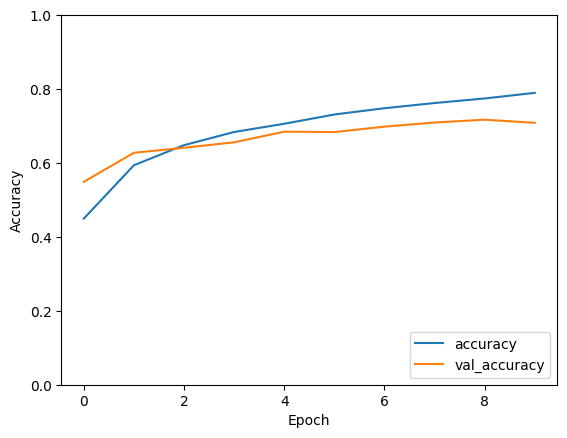

In [11]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [12]:
# Make predictions
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 3s 10ms/step


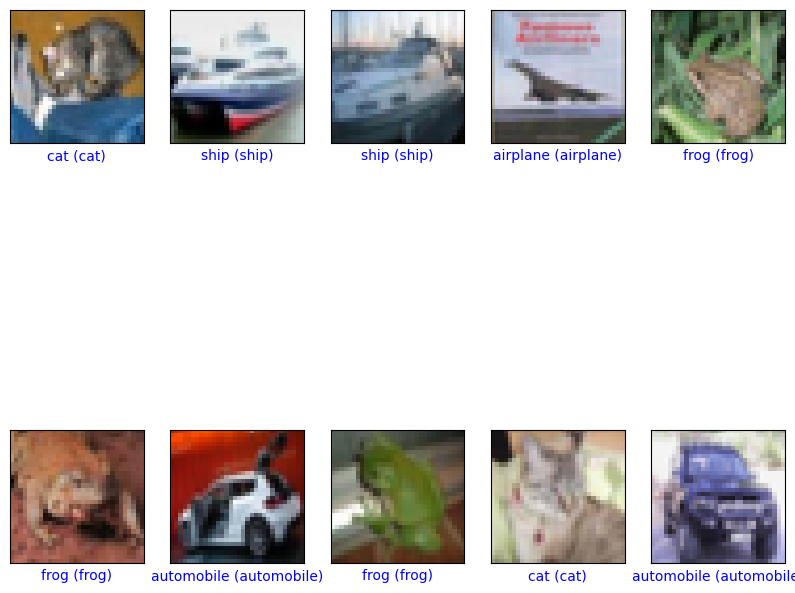

In [15]:
# Display the first 5 test images, their predicted labels, and the true labels
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = class_names[predictions[i].argmax()]
    true_label = class_names[test_labels[i][0]]
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"{predicted_label} ({true_label})", color=color)
plt.show()